In [1]:
import pandas as pd
import reverse_geocode
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#tranco
tranco_full_df = pd.read_csv("tranco_full_list_for_ranking.csv.crdownload", header=None)
tranco_full_df.columns = ["tranco_rank", "domain"]
tranco_full_df.drop(tranco_full_df.tail(1).index, inplace=True)
tranco_full_df

,tranco_rank,domain
0,1,google.com
1,2,facebook.com
2,3,a-msedge.net
3,4,youtube.com
4,5,microsoft.com
...,...,...
173262,173263,psion.com
173263,173264,ajo.com
173264,173265,worldofmedicalsaviours.com
173265,173266,hdvideosporn.net


In [3]:
benign_domain_df = pd.read_csv("benign_domain_list.csv", header=None)
benign_domain_df.columns = ["domain"]
benign_domain_df.head(50)

,domain
0,google.com
1,facebook.com
2,a-msedge.net
3,youtube.com
4,microsoft.com
5,amazonaws.com
6,twitter.com
7,baidu.com
8,cloudflare.com
9,instagram.com


In [4]:
malicious_url_df = pd.read_csv("Malicious_URLs.csv")
malicious_url_domain_list = []

for url in malicious_url_df['url']:
    domain = url.split('//')[1]
    domain = domain.split('/')[0]
    if domain[0:4] == "www.":
        domain = domain.split('www.')[1]
    malicious_url_domain_list.append(domain)
malicious_url_df['domain'] = malicious_url_domain_list
malicious_url_df.drop(malicious_url_df.tail(1).index, inplace=True)
malicious_url_df.head(50)
#print(domain[0])

,url,domain
0,https://ervashipping.com/,ervashipping.com
1,http://www.gabung-grupmabarcimbrut.duckdns.org/,gabung-grupmabarcimbrut.duckdns.org
2,http://republik-jancuk.000webhostapp.com/,republik-jancuk.000webhostapp.com
3,https://www.chet-notnkt8-grup.duckdns.org/,chet-notnkt8-grup.duckdns.org
4,http://veromcertiom.ddns.net/connexion/certico...,veromcertiom.ddns.net
5,https://www.grupevosnotnot-news01.duckdns.org/,grupevosnotnot-news01.duckdns.org
6,http://ca82416.tmweb.ru/postale_oth/,ca82416.tmweb.ru
7,https://hotmail20211.weebly.com/,hotmail20211.weebly.com
8,http://chet-notnkt8-grup.duckdns.org/,chet-notnkt8-grup.duckdns.org
9,http://roan-time-pullover.glitch.me/,roan-time-pullover.glitch.me


In [5]:
mixed_domain_df = pd.read_csv('mixed_domain_list.csv', header=None)
mixed_domain_df.columns = ["domain"]

mixed_domain_df.describe()

,domain
count,183
unique,181
top,carlnagelconsulting.com
freq,2


In [6]:
#spamhaus badness score data
spamhaus_df = pd.read_csv("spamhaus.csv")
spamhaus_df.columns = ['TLD', 'badness_score']
spamhaus_df

,TLD,badness_score
0,aaa,0.00
1,abb,0.00
2,abbott,0.00
3,abbvie,0.00
4,abogado,0.00
...,...,...
996,zip,0.00
997,zm,0.00
998,zone,0.72
999,zuerich,0.00


In [7]:
#merge on tranco rank
malicious_url_df = pd.merge(malicious_url_df, tranco_full_df, on='domain', how = "inner")
benign_domain_df = pd.merge(benign_domain_df, tranco_full_df, on='domain', how = "inner")
mixed_domain_df = pd.merge(mixed_domain_df, tranco_full_df, on='domain', how = "inner")

print(benign_domain_df)
print(mixed_domain_df)
print(malicious_url_df)

              domain  tranco_rank
0         google.com            1
1       facebook.com            2
2       a-msedge.net            3
3        youtube.com            4
4      microsoft.com            5
...              ...          ...
4957    bethesda.net         5361
4958  shopifysvc.com         4891
4959      instana.io         5392
4960       oanda.com         5124
4961  skyscanner.com         5150

[4962 rows x 2 columns]
                   domain  tranco_rank
0              goodrx.com         3509
1          weather.com.cn         3524
2          draftkings.com         3470
3            suntimes.com         3523
4              moe.gov.cn         3519
..                    ...          ...
106     domaincontrol.com           21
107            akamai.net           22
108                pg.com           23
109             yahoo.com           24
110  googletagmanager.com           25

[111 rows x 2 columns]
                                                   url         domain  \
0 

In [8]:
#TLDs
tranco_tld_list = []
malicious_tld_list = []
benign_tld_list = []
mixed_tld_list = []

for dom in tranco_full_df['domain']:
    dom = dom.split('.')[1]
    tranco_tld_list.append(dom)
tranco_full_df['TLD'] = tranco_tld_list

for dom in malicious_url_df['domain']:
    dom = ''.join(dom.split('.')[-1:])
    malicious_tld_list.append(dom)
malicious_url_df['TLD'] = malicious_tld_list

for dom in benign_domain_df['domain']:
    dom = dom.split('.')[1]
    dom = dom.split('.')[0]
    benign_tld_list.append(dom)
benign_domain_df['TLD'] = benign_tld_list

for dom in mixed_domain_df['domain']:
    dom = dom.split('.')[1]
    mixed_tld_list.append(dom)
mixed_domain_df['TLD'] = mixed_tld_list

print(benign_domain_df)
print(mixed_domain_df)
print(tranco_full_df)
print(malicious_url_df)

              domain  tranco_rank  TLD
0         google.com            1  com
1       facebook.com            2  com
2       a-msedge.net            3  net
3        youtube.com            4  com
4      microsoft.com            5  com
...              ...          ...  ...
4957    bethesda.net         5361  net
4958  shopifysvc.com         4891  com
4959      instana.io         5392   io
4960       oanda.com         5124  com
4961  skyscanner.com         5150  com

[4962 rows x 3 columns]
                   domain  tranco_rank  TLD
0              goodrx.com         3509  com
1          weather.com.cn         3524  com
2          draftkings.com         3470  com
3            suntimes.com         3523  com
4              moe.gov.cn         3519  gov
..                    ...          ...  ...
106     domaincontrol.com           21  com
107            akamai.net           22  net
108                pg.com           23  com
109             yahoo.com           24  com
110  googletagmanager.c

In [9]:
#Domain lengths
tranco_domain_len = []
malicious_domain_len = []
benign_domain_len = []
mixed_domain_len = []
count=0
tranco_domain_len_count = 0
malicious_domain_len_count = 0
benign_domain_len_count = 0
miced_domain_len_count = 0

for dom in tranco_full_df['domain']:
    tranco_domain_len.append(len(dom))
tranco_full_df['domain_len'] = tranco_domain_len

for dom in malicious_url_df['domain']:
    malicious_domain_len.append(len(dom))
malicious_url_df['domain_len'] = malicious_domain_len

for dom in benign_domain_df['domain']:
    benign_domain_len.append(len(dom))
benign_domain_df['domain_len'] = benign_domain_len

for dom in mixed_domain_df['domain']:
    mixed_domain_len.append(len(dom))
mixed_domain_df['domain_len'] = mixed_domain_len

print(benign_domain_df)
print(mixed_domain_df)
print(tranco_full_df)
print(malicious_url_df)

              domain  tranco_rank  TLD  domain_len
0         google.com            1  com          10
1       facebook.com            2  com          12
2       a-msedge.net            3  net          12
3        youtube.com            4  com          11
4      microsoft.com            5  com          13
...              ...          ...  ...         ...
4957    bethesda.net         5361  net          12
4958  shopifysvc.com         4891  com          14
4959      instana.io         5392   io          10
4960       oanda.com         5124  com           9
4961  skyscanner.com         5150  com          14

[4962 rows x 4 columns]
                   domain  tranco_rank  TLD  domain_len
0              goodrx.com         3509  com          10
1          weather.com.cn         3524  com          14
2          draftkings.com         3470  com          14
3            suntimes.com         3523  com          12
4              moe.gov.cn         3519  gov          10
..                    ...  

In [10]:
#digit count/digit percentage
tranco_digit_count = 0
malicious_digit_count = 0
benign_digit_count = 0
mixed_digit_count = 0

tranco_digit_list = []
malicious_digit_list = []
benign_digit_list = []
mixed_digit_list = []

tranco_digit_percent_list = []
malicious_digit_percent_list = []
benign_digit_percent_list = []
mixed_digit_percent_list = []
digit_percent = 0

#tranco benign dataaset
for dom in tranco_full_df['domain']:
        for c in dom:
            if c.isdigit():
                tranco_digit_count += 1
        digit_percent = tranco_digit_count / len(dom) * 100
        tranco_digit_percent_list.append(digit_percent)
        tranco_digit_list.append(tranco_digit_count)
        tranco_digit_count = 0
tranco_full_df['digit_count'] = tranco_digit_list
tranco_full_df['digit_percent'] = tranco_digit_percent_list

#malicious data
for dom in malicious_url_df['domain']:
        for c in dom:
            if c.isdigit():
                malicious_digit_count += 1
        if len(dom) != 0:
            digit_percent = (malicious_digit_count / len(dom)) * 100
        malicious_digit_percent_list.append(digit_percent)
        malicious_digit_list.append(malicious_digit_count)
        malicious_digit_count = 0
malicious_url_df['digit_count'] = malicious_digit_list
malicious_url_df['digit_percent'] = malicious_digit_percent_list

#benign data
for dom in benign_domain_df['domain']:
        for c in dom:
            if c.isdigit():
                benign_digit_count += 1
        digit_percent = benign_digit_count / len(dom) * 100
        benign_digit_percent_list.append(digit_percent)
        benign_digit_list.append(benign_digit_count)
        benign_digit_count = 0
benign_domain_df['digit_count'] = benign_digit_list
benign_domain_df['digit_percent'] = benign_digit_percent_list

#c2 malicious dataset
for dom in mixed_domain_df['domain']:
        for c in dom:
            if c.isdigit():
                mixed_digit_count += 1
        digit_percent = mixed_digit_count / len(dom) * 100
        mixed_digit_percent_list.append(digit_percent)
        mixed_digit_list.append(mixed_digit_count)
        mixed_digit_count=0
mixed_domain_df['digit_count'] = mixed_digit_list        
mixed_domain_df['digit_percent'] = mixed_digit_percent_list

print(benign_domain_df)
print(mixed_domain_df)
print(tranco_full_df)
print(malicious_url_df)

              domain  tranco_rank  TLD  domain_len  digit_count  digit_percent
0         google.com            1  com          10            0            0.0
1       facebook.com            2  com          12            0            0.0
2       a-msedge.net            3  net          12            0            0.0
3        youtube.com            4  com          11            0            0.0
4      microsoft.com            5  com          13            0            0.0
...              ...          ...  ...         ...          ...            ...
4957    bethesda.net         5361  net          12            0            0.0
4958  shopifysvc.com         4891  com          14            0            0.0
4959      instana.io         5392   io          10            0            0.0
4960       oanda.com         5124  com           9            0            0.0
4961  skyscanner.com         5150  com          14            0            0.0

[4962 rows x 6 columns]
                   domain  

In [11]:
#unique characters
tranco_unique_char_list = []
malicious_unique_char_list = []
benign_unique_char_list = []
mixed_unique_char_list = []

#returns the unique character count
def uniqueCount(str):
    list = set(str)
    return len(list)

for dom in tranco_full_df['domain']:
    dom = dom.split('.')[0]
    tranco_unique_char_list.append(uniqueCount(dom))
tranco_full_df['unique_char_count'] = tranco_unique_char_list

for dom in malicious_url_df['domain']:
    dom = dom.split('.')[0]
    malicious_unique_char_list.append(uniqueCount(dom))
malicious_url_df['unique_char_count'] = malicious_unique_char_list

for dom in benign_domain_df['domain']:
    dom = dom.split('.')[0]
    benign_unique_char_list.append(uniqueCount(dom))
benign_domain_df['unique_char_count'] = benign_unique_char_list

for dom in mixed_domain_df['domain']:
    dom = dom.split('.')[0]
    mixed_unique_char_list.append(uniqueCount(dom))
mixed_domain_df['unique_char_count'] = mixed_unique_char_list


print(benign_domain_df)
print(mixed_domain_df)
print(tranco_full_df)
print(malicious_url_df)

              domain  tranco_rank  TLD  domain_len  digit_count  \
0         google.com            1  com          10            0   
1       facebook.com            2  com          12            0   
2       a-msedge.net            3  net          12            0   
3        youtube.com            4  com          11            0   
4      microsoft.com            5  com          13            0   
...              ...          ...  ...         ...          ...   
4957    bethesda.net         5361  net          12            0   
4958  shopifysvc.com         4891  com          14            0   
4959      instana.io         5392   io          10            0   
4960       oanda.com         5124  com           9            0   
4961  skyscanner.com         5150  com          14            0   

      digit_percent  unique_char_count  
0               0.0                  4  
1               0.0                  7  
2               0.0                  7  
3               0.0            

In [12]:
#merge spamhaus data on tld to populate badness score for each dataset

tranco_full_df = pd.merge(tranco_full_df, spamhaus_df, on='TLD', how = "inner")
malicious_url_df = pd.merge(malicious_url_df, spamhaus_df, on='TLD', how = "inner")
benign_domain_df = pd.merge(benign_domain_df, spamhaus_df, on='TLD', how = "inner")
mixed_domain_df = pd.merge(mixed_domain_df, spamhaus_df, on='TLD', how = "inner")

print(benign_domain_df)
print(mixed_domain_df)
print(tranco_full_df)
print(malicious_url_df)

             domain  tranco_rank   TLD  domain_len  digit_count  \
0        google.com            1   com          10            0   
1      facebook.com            2   com          12            0   
2       youtube.com            4   com          11            0   
3     microsoft.com            5   com          13            0   
4     amazonaws.com            6   com          13            0   
...             ...          ...   ...         ...          ...   
4947         itv.kg         8710    kg           6            0   
4948    teleport.sh         4497    sh          11            0   
4949    hostia.name         5116  name          11            0   
4950       csiro.au         5168    au           8            0   
4951        tool.lu         5300    lu           7            0   

      digit_percent  unique_char_count  badness_score  
0               0.0                  4           0.18  
1               0.0                  7           0.18  
2               0.0        

In [13]:
#period/hyphen count
tranco_period_list = []
malicious_period_list = []
benign_period_list = []
mixed_period_list = []
period_count = 0

tranco_hyphen_list = []
malicious_hyphen_list = []
benign_hyphen_list = []
mixed_hyphen_list = []
hyphen_count = 0

for dom in tranco_full_df['domain']:
    period_count = dom.count(".")
    hyphen_count = dom.count("-")
    tranco_period_list.append(period_count)
    tranco_hyphen_list.append(hyphen_count)
tranco_full_df['period_count'] = tranco_period_list
tranco_full_df['hyphen_count'] = tranco_hyphen_list

for dom in malicious_url_df['domain']:
    period_count = dom.count(".")
    hyphen_count = dom.count("-")
    malicious_period_list.append(period_count)
    malicious_hyphen_list.append(hyphen_count)
malicious_url_df['period_count'] = malicious_period_list
malicious_url_df['hyphen_count'] = malicious_hyphen_list

for dom in benign_domain_df['domain']:
    period_count = dom.count(".")
    hyphen_count = dom.count("-")
    benign_period_list.append(period_count)
    benign_hyphen_list.append(hyphen_count)
benign_domain_df['period_count'] = benign_period_list
benign_domain_df['hyphen_count'] = benign_hyphen_list

for dom in mixed_domain_df['domain']:
    period_count = dom.count(".")
    hyphen_count = dom.count("-")
    mixed_period_list.append(period_count)
    mixed_hyphen_list.append(hyphen_count)
mixed_domain_df['period_count'] = mixed_period_list
mixed_domain_df['hyphen_count'] = mixed_hyphen_list

print(benign_domain_df)
print(mixed_domain_df)
print(tranco_full_df)
print(malicious_url_df)

             domain  tranco_rank   TLD  domain_len  digit_count  \
0        google.com            1   com          10            0   
1      facebook.com            2   com          12            0   
2       youtube.com            4   com          11            0   
3     microsoft.com            5   com          13            0   
4     amazonaws.com            6   com          13            0   
...             ...          ...   ...         ...          ...   
4947         itv.kg         8710    kg           6            0   
4948    teleport.sh         4497    sh          11            0   
4949    hostia.name         5116  name          11            0   
4950       csiro.au         5168    au           8            0   
4951        tool.lu         5300    lu           7            0   

      digit_percent  unique_char_count  badness_score  period_count  \
0               0.0                  4           0.18             1   
1               0.0                  7           0.18

In [14]:
import seaborn as sns
import statsmodels.stats.api as sms

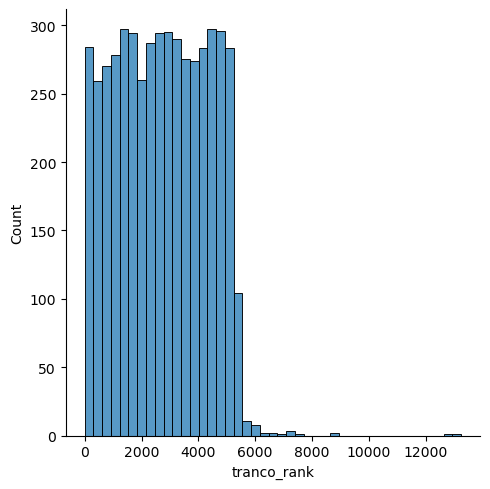

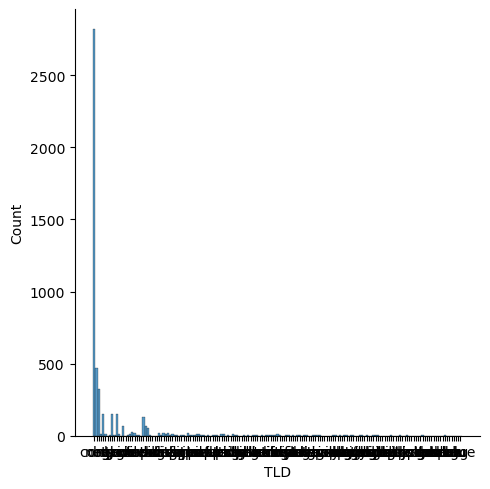

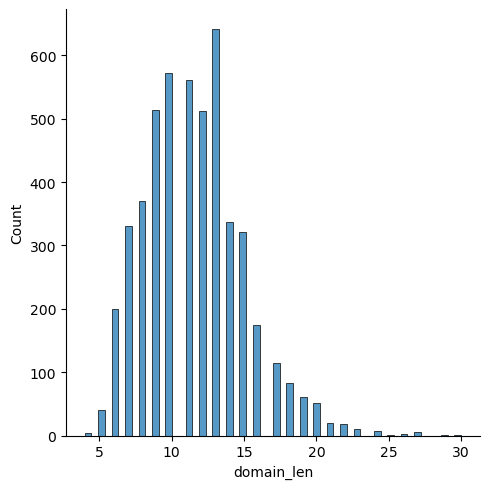

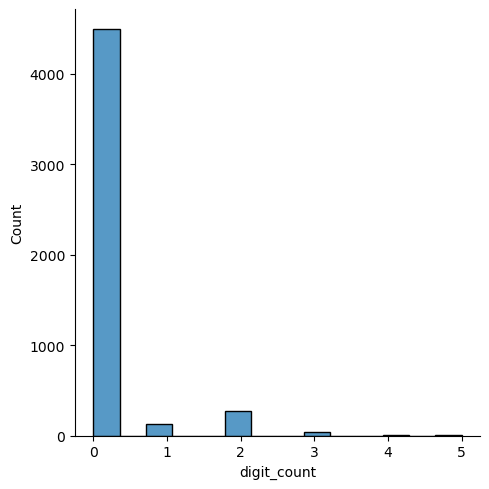

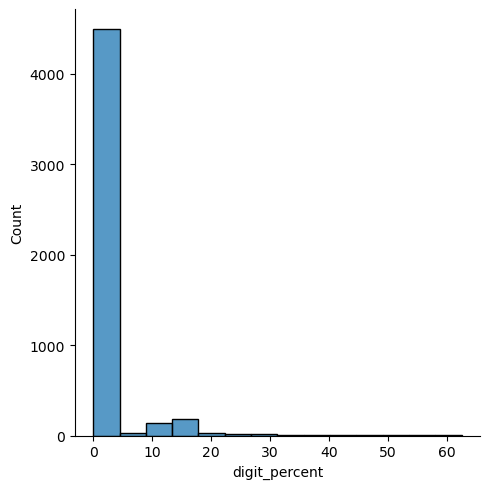

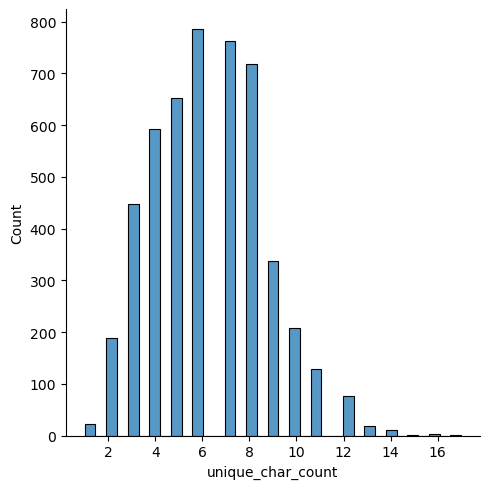

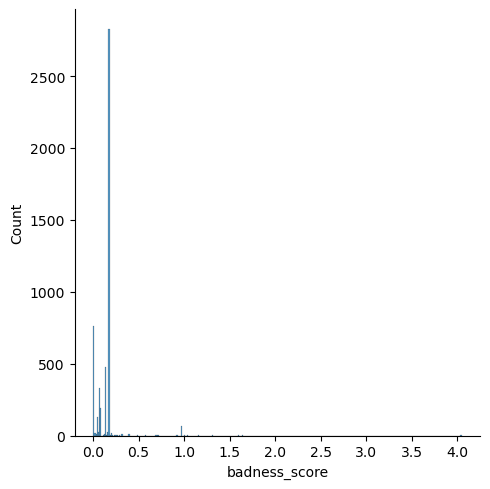

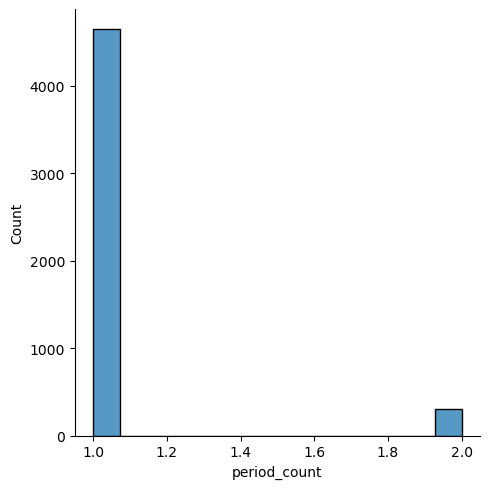

In [15]:
#gap analysis benign
cols = benign_domain_df.columns[1:-1]
for col in benign_domain_df[cols]:
    sns.displot(x=col, data=benign_domain_df)

In [16]:
#benign stats
benign_list = []
malicious_list = []

cols = benign_domain_df.columns[:]
for col in benign_domain_df[cols]:
    stdev = benign_domain_df[col].describe()
    benign_list.append(stdev)
benign_df = pd.DataFrame(benign_list)

for col in malicious_url_df[cols]:
    stdev = malicious_url_df[col].describe()
    malicious_list.append(stdev)
malicious_df = pd.DataFrame(malicious_list)

benign_df = benign_df.reset_index()
malicious_df = malicious_df.reset_index(drop=False)
print("benign")
print(benign_df)
print("malicious")
print(malicious_df)

benign
               index   count  unique         top    freq         mean  \
0             domain  4952.0  4952.0  google.com     1.0          NaN   
1        tranco_rank  4952.0     NaN         NaN     NaN  2726.851777   
2                TLD  4952.0   165.0         com  2819.0          NaN   
3         domain_len  4952.0     NaN         NaN     NaN    11.540186   
4        digit_count  4952.0     NaN         NaN     NaN     0.177100   
5      digit_percent  4952.0     NaN         NaN     NaN     1.578692   
6  unique_char_count  4952.0     NaN         NaN     NaN     6.277666   
7      badness_score  4952.0     NaN         NaN     NaN     0.147211   
8       period_count  4952.0     NaN         NaN     NaN     1.061995   
9       hyphen_count  4952.0     NaN         NaN     NaN     0.091074   

           std  min      25%      50%      75%       max  
0          NaN  NaN      NaN      NaN      NaN       NaN  
1  1576.058693  1.0  1389.00  2727.50  4071.25  13253.00  
2          N

In [56]:
#mixed domains with bad ones removed
mixed_copy = mixed_domain_df.drop(mixed_domain_df[mixed_domain_df.tranco_rank > ((2726.85) + (2 * 1576.06))].index)
mixed_copy = mixed_copy.drop(mixed_copy[mixed_copy.domain_len < 9].index)
mixed_copy = mixed_copy.drop(mixed_copy[mixed_copy.digit_count > 0].index)
mixed_copy = mixed_copy.drop(mixed_copy[mixed_copy.period_count > 1].index)
mixed_copy = mixed_copy.drop(mixed_copy[mixed_copy.badness_score > .18].index)
mixed_copy = mixed_copy.drop(mixed_copy[mixed_copy.hyphen_count > 1].index)
print(mixed_copy)


             domain  tranco_rank  TLD  domain_len  digit_count  digit_percent  \
0        goodrx.com         3509  com          10            0            0.0   
2    draftkings.com         3470  com          14            0            0.0   
3      suntimes.com         3523  com          12            0            0.0   
7        kompas.com         3693  com          10            0            0.0   
9    localytics.com         3744  com          14            0            0.0   
..              ...          ...  ...         ...          ...            ...   
99        google.se         3796   se           9            0            0.0   
102     metamask.io         2692   io          11            0            0.0   
103    second-ns.de         4121   de          12            0            0.0   
107     swisscom.ch          343   ch          11            0            0.0   
109    dzeninfra.ru          461   ru          12            0            0.0   

     unique_char_count  bad

In [18]:
#